Facebook is a company that has been in a lot of hot water before about taking people data, so it is no surprise to me to find out that Facebook has a whole collection of data that is collected from places other than Facebook itself. I want to go through my data in this analysis and see what Facebook has tracked from what websites I have been to in the past. If I had to guess, there probably is not a whole lot of data collected. I think this is the case because I do not use Facebook super often, so I think the only things that would be in the data is maybe links that I have clicked on in the Facebook web page. I would assume it would mostly be Youtube maybe and possibly Card Kingdom.

I will start by importing all of the libraries that I will need for the two parts of this assignment. Then I will grab all of the data that Facebook has collected and throw together a simple Pandas data frame.

In [37]:
import json
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import base64
import requests

In [3]:
with open(r"C:\Users\chris\DataEMATfall22\facebook-christopherkinnison7\apps_and_websites_off_of_facebook\your_off-facebook_activity.json") as j:
    facebook_data = json.load(j)

In [4]:
facebook_data['off_facebook_activity_v2']

[{'name': 'cheddarstudios.net',
  'events': [{'id': 631520341549485,
    'type': 'PAGE_VIEW',
    'timestamp': 1662334140}]},
 {'name': 'cardkingdom.com',
  'events': [{'id': 325102331546565,
    'type': 'PAGE_VIEW',
    'timestamp': 1662085200},
   {'id': 325102331546565, 'type': 'PAGE_VIEW', 'timestamp': 1662065160}]},
 {'name': 'studocu.com',
  'events': [{'id': 1612937968993502,
    'type': 'CUSTOM',
    'timestamp': 1662058320}]},
 {'name': 'DPG Media B.V.',
  'events': [{'id': 894951611068637,
    'type': 'LEAD',
    'timestamp': 1661512080}]},
 {'name': 'Digital Media Solutions - 2',
  'events': [{'id': 391319899006949,
    'type': 'LEAD',
    'timestamp': 1654283400}]},
 {'name': 'guildeducation.com',
  'events': [{'id': 1610823502531648,
    'type': 'PAGE_VIEW',
    'timestamp': 1653582780},
   {'id': 1610823502531648, 'type': 'PAGE_VIEW', 'timestamp': 1653582540},
   {'id': 1610823502531648, 'type': 'PAGE_VIEW', 'timestamp': 1652894760}]},
 {'name': 'MEDIALAAN',
  'events': [

In [5]:
fb_data_df = pd.DataFrame(facebook_data['off_facebook_activity_v2'])

In [6]:
fb_data_df.head()

,name,events
0,cheddarstudios.net,"[{'id': 631520341549485, 'type': 'PAGE_VIEW', ..."
1,cardkingdom.com,"[{'id': 325102331546565, 'type': 'PAGE_VIEW', ..."
2,studocu.com,"[{'id': 1612937968993502, 'type': 'CUSTOM', 't..."
3,DPG Media B.V.,"[{'id': 894951611068637, 'type': 'LEAD', 'time..."
4,Digital Media Solutions - 2,"[{'id': 391319899006949, 'type': 'LEAD', 'time..."


The data frame has a column called events that I will need to dig into in order to get a more complete picture. There are a number of events for each website that I have visited, and the number of events is equal to the number of times I have visited that site. I know this from the ID and the Timestamp sections in events. In this next few cells of code I plan on getting the number of events for each website and throwing them into the data frame that I have created, while making said column represent the number of times I went to each site. I will then proceed to make two different graphs representing the data. One of these will show the the count data, and the other will show my top 20 visited sites. 

In [20]:
num_events = [len(x) for x in fb_data_df['events']]
num_events

[1,
 2,
 1,
 1,
 1,
 3,
 1,
 20,
 13,
 10,
 6,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 6,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 10,
 1,
 3,
 1,
 8,
 4,
 1,
 5,
 1,
 1]

In [25]:
fb_data_df['events'] = num_events
fb_data_df

,name,events
0,cheddarstudios.net,1
1,cardkingdom.com,2
2,studocu.com,1
3,DPG Media B.V.,1
4,Digital Media Solutions - 2,1
5,guildeducation.com,3
6,MEDIALAAN,1
7,janegoodall.org,20
8,figma.com,13
9,Esri,10


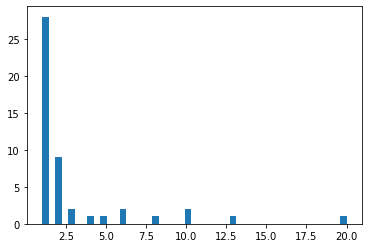

In [30]:
fig1, ax1 = plt.subplots()
ax1.hist(fb_data_df['events'], bins = 47)
plt.show()

In [32]:
sort_df = fb_data_df.sort_values('events', ascending = False)
sort_df

,name,events
7,janegoodall.org,20
8,figma.com,13
38,intuit.com,10
9,Esri,10
42,lendingclub.com,8
10,esri.com,6
18,joinhandshake.com,6
45,unity.com,5
43,Lending Club,4
5,guildeducation.com,3


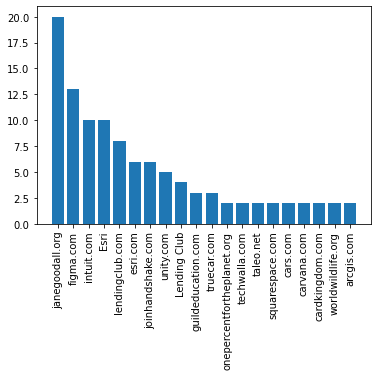

In [36]:
fig1, ax1 = plt.subplots()
ax1.bar(sort_df['name'][0:20], sort_df['events'][0:20])
plt.xticks(rotation = 90)
plt.show()

The only think that can be concluded about the first graph is that most of the sites that I have visited off of Facebook, have only been visited one time. It also shows that there is a clear outlier in the single website that I have visited 20 different times. From looking at the second graph, it shows something very interesting. It shows a lot of site that I have used for school, whether it be group projects or research papers. This is interesting to me because I know that I have been to many more different sites a greater number of times, but for some reason they do not show up here. I would conclude that maybe Facebook only collects data if you visit these web pages while using the same computer. It does not seem to matter what account you are in under. I think Facebook would look at this data and think that I am someone who is very interested in geography and wildlife conservation. I think that they could easily come to this conclusion because in my top 20 visited sites, 3 of them are map creating sites and 4 are based on saving the planet. I think they might also think that I am in the market for a car based on 2 car seller site being on there. There conclusion would be semi accurate, but mostly not because almost all of these web pages come from school work. I think they are limited in whatever way that the collect this data. I am not sure how it is collected, but it does not seem to capture the whole picture. Incomplete data leads to poor assumptions.

In the second part of this assignment, I will be looking at two of my very favorite albums of all time and be comparing some audio features for both. I chose to look at The Cool by Lupe Fiasco and Views by Drake. I chose both of these albums because they are both hiphop, which is probably my favorite genre, but I also chose them because there is a good chance that I have listened to them more than any other albums.I will be grabbing the data off of spotify in order to compare the valance and danceability of all of the tracks on both of the albums. I chose danceability because I feel like this is a very important aspect of any music in general, but for hiphop in particular. Then I also wanted to look at the valance because I think it would be interesting to look and see which album is overall happier as compared to which album has a sadder tone. In these first few lines of code I am grabbing the data off of spotify and turning the dictionaries into simple Panda data frames that show all of the audio features for each song. Then I will be making a few graphs to compare them.

In [38]:
keys = pd.read_csv("Spotify-Keys_10-18-22.txt", header = 0, sep = ",")
appid = keys['Client_ID'][0]
appsecret = keys['Client_Secret'][0]
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"
response = requests.post(access_token_url, headers = header, data = payload)
session_token = response.json()['access_token']
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

In [41]:
#Lupe Fiasco's The Cool
cool_id = '0MihD70HInk2rDaChdAdEy'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(cool_id)
cool_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(cool_tracks.status_code)
cool_dict = json.loads(cool_tracks.text)
cool_track_ids = [x['id'] for x in cool_dict['items']]
cool_track_strings = ','.join(str(x) for x in cool_track_ids)
print(cool_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(cool_track_strings)

200
5EHhkMTHKGpURNo32lDXFQ,3VkAjkB2HYkXyrCqj3ZG3m,2aLVUQS8wipdinBxqm5YBE,1R6nmC4HUGOGSKU02Wqa0v,7dltD9eEX7X1zk8JJ9BS0e,2dXME00xUY1CRcMZsM3Y4q,5TwtHTqjpEqHmePcCX9XZr,2DGMORz6TjhKgCYM7quaZh,6N3oYlfZ2RPdjMYdHCRmFS,2fjOaSt26CeQCCCgn8brsH,1fNpOEgu770UrRTzeVsKZT,7sb2qiE0af4NggQPa5FkYY,3UZH1lr5vx7S19ilecUtwj,0SPUNC31ZXVbadaj4M5TfD,5ki2p4PK1nQgTmf3TRSREu,15Y3wFvRKbbnxrsCALs8AH,5PlYCPa9eV21gJcK5cQiZi,2Kh1dZBgQAJQ2ZQ6AjMQdp,0QtbNh8K4XVc7SPahj3uVK


In [43]:
cool_features = requests.get(track_features_endpoint, headers = session_header)
cool_dict = json.loads(cool_features.text)
cool_dict['audio_features'][0]

{'danceability': 0.722,
 'energy': 0.178,
 'key': 1,
 'loudness': -10.716,
 'mode': 1,
 'speechiness': 0.883,
 'acousticness': 0.764,
 'instrumentalness': 0,
 'liveness': 0.132,
 'valence': 0.592,
 'tempo': 77.146,
 'type': 'audio_features',
 'id': '5EHhkMTHKGpURNo32lDXFQ',
 'uri': 'spotify:track:5EHhkMTHKGpURNo32lDXFQ',
 'track_href': 'https://api.spotify.com/v1/tracks/5EHhkMTHKGpURNo32lDXFQ',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5EHhkMTHKGpURNo32lDXFQ',
 'duration_ms': 46920,
 'time_signature': 4}

In [46]:
cool_df = pd.DataFrame(cool_dict['audio_features'])
cool_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.722,0.178,1,-10.716,1,0.8830,0.764000,0.0,0.1320,0.592,77.146,audio_features,5EHhkMTHKGpURNo32lDXFQ,spotify:track:5EHhkMTHKGpURNo32lDXFQ,https://api.spotify.com/v1/tracks/5EHhkMTHKGpU...,https://api.spotify.com/v1/audio-analysis/5EHh...,46920,4
1,0.256,0.665,9,-9.417,0,0.0934,0.000939,0.0,0.1070,0.383,135.774,audio_features,3VkAjkB2HYkXyrCqj3ZG3m,spotify:track:3VkAjkB2HYkXyrCqj3ZG3m,https://api.spotify.com/v1/tracks/3VkAjkB2HYkX...,https://api.spotify.com/v1/audio-analysis/3VkA...,62027,1
2,0.794,0.934,11,-4.716,0,0.0842,0.115000,0.0,0.0654,0.964,148.014,audio_features,2aLVUQS8wipdinBxqm5YBE,spotify:track:2aLVUQS8wipdinBxqm5YBE,https://api.spotify.com/v1/tracks/2aLVUQS8wipd...,https://api.spotify.com/v1/audio-analysis/2aLV...,250387,4
3,0.493,0.882,6,-5.143,0,0.3020,0.634000,0.0,0.1230,0.345,88.535,audio_features,1R6nmC4HUGOGSKU02Wqa0v,spotify:track:1R6nmC4HUGOGSKU02Wqa0v,https://api.spotify.com/v1/tracks/1R6nmC4HUGOG...,https://api.spotify.com/v1/audio-analysis/1R6n...,312933,4
4,0.572,0.822,11,-6.015,0,0.3610,0.207000,0.0,0.3590,0.472,94.812,audio_features,7dltD9eEX7X1zk8JJ9BS0e,spotify:track:7dltD9eEX7X1zk8JJ9BS0e,https://api.spotify.com/v1/tracks/7dltD9eEX7X1...,https://api.spotify.com/v1/audio-analysis/7dlt...,289000,4


In [47]:
#Drake's Views
view_id = '40GMAhriYJRO1rsY4YdrZb'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(view_id)
view_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(view_tracks.status_code)
view_dict = json.loads(view_tracks.text)
view_track_ids = [x['id'] for x in view_dict['items']]
view_track_strings = ','.join(str(x) for x in view_track_ids)
print(view_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(view_track_strings)

200
7sBwAWyXfiIgrYQ8BaJESH,1C7KSXR2GVxknex6I4ANco,03L2AoiRbWhvt7BDMx1jUB,3cjF2OFRmip8spwZYQRKxP,5NFYuqu8V6QXc6mzcLImd6,4PA16FAl8LPmFmOhARawdV,4cRBqWBjuccCowYVHFlXK6,3aJkV6DUTSCqOwVwaBDG9B,2qLcJOLrh6Djda4uLbldSA,433P7tDcIAi6NLnf4Sh6tI,3O8NlPh2LByMU9lSRSHedm,1zi7xx7UVEFkmKfv06H8x0,5e574bhjycX1eH2l4Auage,3NxAG2ni1lLa8RKL6a0INc,5mPSyjLatqB00IkPqRlbTE,3BtuIIrQlkujKPuWF2B85z,3ppVO2tyWRRznNmONvt7Se,4BhGTc3Cgay2U1QcTS7vQe,7MjSipTto9QljYzZnloXOn,0wwPcA6wtMf6HUMpIRdeP7


In [48]:
view_features = requests.get(track_features_endpoint, headers = session_header)
view_dict = json.loads(view_features.text)
view_dict['audio_features'][0]

{'danceability': 0.378,
 'energy': 0.566,
 'key': 9,
 'loudness': -7.685,
 'mode': 0,
 'speechiness': 0.0482,
 'acousticness': 0.149,
 'instrumentalness': 0,
 'liveness': 0.382,
 'valence': 0.196,
 'tempo': 87.691,
 'type': 'audio_features',
 'id': '7sBwAWyXfiIgrYQ8BaJESH',
 'uri': 'spotify:track:7sBwAWyXfiIgrYQ8BaJESH',
 'track_href': 'https://api.spotify.com/v1/tracks/7sBwAWyXfiIgrYQ8BaJESH',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7sBwAWyXfiIgrYQ8BaJESH',
 'duration_ms': 328907,
 'time_signature': 3}

In [49]:
view_df = pd.DataFrame(view_dict['audio_features'])
view_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.378,0.566,9,-7.685,0,0.0482,0.149000,0.000000,0.382,0.1960,87.691,audio_features,7sBwAWyXfiIgrYQ8BaJESH,spotify:track:7sBwAWyXfiIgrYQ8BaJESH,https://api.spotify.com/v1/tracks/7sBwAWyXfiIg...,https://api.spotify.com/v1/audio-analysis/7sBw...,328907,3
1,0.680,0.712,10,-7.184,1,0.0453,0.000803,0.000612,0.237,0.0379,100.009,audio_features,1C7KSXR2GVxknex6I4ANco,spotify:track:1C7KSXR2GVxknex6I4ANco,https://api.spotify.com/v1/tracks/1C7KSXR2GVxk...,https://api.spotify.com/v1/audio-analysis/1C7K...,255787,4
2,0.429,0.430,2,-11.373,1,0.1650,0.338000,0.000012,0.138,0.1250,174.983,audio_features,03L2AoiRbWhvt7BDMx1jUB,spotify:track:03L2AoiRbWhvt7BDMx1jUB,https://api.spotify.com/v1/tracks/03L2AoiRbWhv...,https://api.spotify.com/v1/audio-analysis/03L2...,297373,4
3,0.582,0.677,7,-7.081,1,0.1720,0.031200,0.000007,0.122,0.2050,193.818,audio_features,3cjF2OFRmip8spwZYQRKxP,spotify:track:3cjF2OFRmip8spwZYQRKxP,https://api.spotify.com/v1/tracks/3cjF2OFRmip8...,https://api.spotify.com/v1/audio-analysis/3cjF...,240653,4
4,0.787,0.635,4,-8.271,0,0.1550,0.025300,0.000000,0.357,0.2370,130.018,audio_features,5NFYuqu8V6QXc6mzcLImd6,spotify:track:5NFYuqu8V6QXc6mzcLImd6,https://api.spotify.com/v1/tracks/5NFYuqu8V6QX...,https://api.spotify.com/v1/audio-analysis/5NFY...,209413,4


For these first two graphs, we comparing the danceability of the tracks on the albums and the second one will compare the valance of the tracks on the albums. From looking at these graphs, it seems that more of the songs on Drake's album are more danceable, which did not really surprise me. I think honestly that the interludes where the not very danceable songs on each of the albums, so I think maybe the next step should be to filter those out to get a clearer picture. That being said, The Cool has much more happier toned songs which is shown in the clearly higher valance song average. This was very surprising to me because The cool is not a very "Happy" album, but I guess I never realized how sad the tone of Views really was until looking at the data.

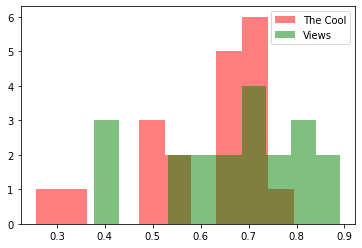

In [50]:
fig1, ax1 = plt.subplots()
c = cool_df['danceability']
v = view_df['danceability']
ax1.hist(c, alpha = 0.5, color = 'red', label = 'The Cool')
ax1.hist(v, alpha = 0.5, color = 'green', label = 'Views')
ax1.legend()
plt.show()

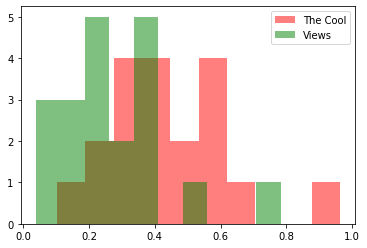

In [52]:
fig1, ax1 = plt.subplots()
c = cool_df['valence']
v = view_df['valence']
ax1.hist(c, alpha = 0.5, color = 'red', label = 'The Cool')
ax1.hist(v, alpha = 0.5, color = 'green', label = 'Views')
ax1.legend()
plt.show()

These next two graphs show the relationship between Danceability and Valance for each of the albums. Each graph shows a single albums songs, and left to right is valance and up and down is danceability. Looking at these graphs shows an interesting perspective, but it also helps to visualize the range of both of the audio features for each album when looking at the mass of the dots. it helps to show an average of both of the features that are being looked at.

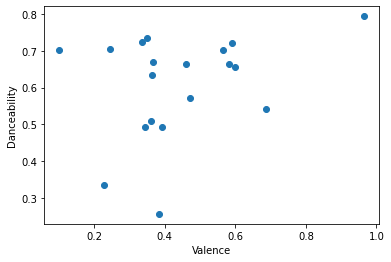

In [57]:
fig1, ax1 = plt.subplots()
v = cool_df['valence']
d = cool_df['danceability']
ax1.scatter(v,d)
ax1.set_ylabel('Danceability')
ax1.set_xlabel('Valence')
plt.show()

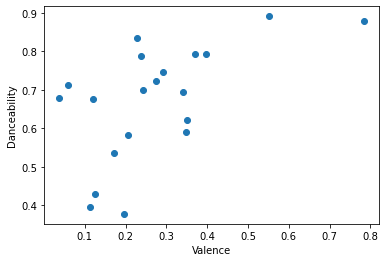

In [58]:
fig1, ax1 = plt.subplots()
v = view_df['valence']
d = view_df['danceability']
ax1.scatter(v,d)
ax1.set_ylabel('Danceability')
ax1.set_xlabel('Valence')
plt.show()

This graph does a particularly good job is showing what the first two graphs were trying to show. It combines what the first two did so well, with what the second two did well at. This was my favorite visual, and it helped me visualize the data much better than the other graphs have done so far.

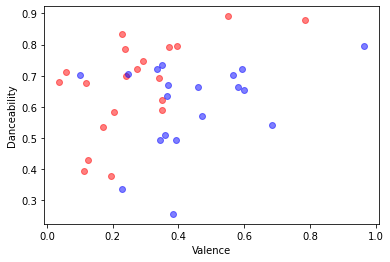

In [59]:
fig1, ax1 = plt.subplots()
vv = view_df['valence']
vd = view_df['danceability']
cv = cool_df['valence']
cd = cool_df['danceability']
ax1.scatter(vv, vd, alpha = 0.5, color = 'red', label = 'The Cool')
ax1.scatter(cv, cd, alpha = 0.5, color = 'blue', label = 'Views')
ax1.set_ylabel('Danceability')
ax1.set_xlabel('Valence')
plt.show()

This last visual just proves the point again, that the Cool has a higher overall valance than Views. 

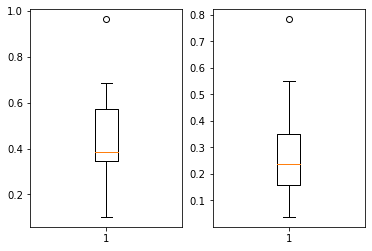

In [63]:
fig1, ax1 = plt.subplots(1,2)
ax1[0].boxplot(cool_df['valence'])
ax1[1].boxplot(view_df['valence'])
plt.show()

Looking at all of this spotify data was interesting. I found it quite fun to explore how my favorite albums compared to each other. There is is most likely some problems with the data, but all in all I feel like it was good enough to make some conclusions on. 